# EDA of Credit Scoring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from scipy.stats import mode

In [2]:
DATA_DIR = './'
DATA = 'cleaned_train.csv'

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA))
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
drop_cols = ['Name', 'SSN']
cleaned_df = df.drop(drop_cols, axis=1)

In [5]:
cleaned_df['Type_of_Loan'][9]

'Credit-Builder Loan'

In [6]:
cleaned_df['Type_of_Loan'].str.split(',')

0        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
1        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
2        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
3        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
4        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
                               ...                        
99995                       [Auto Loan,  and Student Loan]
99996                       [Auto Loan,  and Student Loan]
99997                       [Auto Loan,  and Student Loan]
99998                       [Auto Loan,  and Student Loan]
99999                       [Auto Loan,  and Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [7]:
import re

In [8]:
search = ' and '
space = ' '

In [9]:
def search_and_remove(li, search_word):

    for i, word in enumerate(li):
        if search_word in word:
            li[i] = re.sub(search_word, '', word)
            # li[i] = re.sub(space, '', word)
        # else:
            # li[i] = re.sub(space, '', word)
    return li

def white_space_remover(li, ws):

    for i, word in enumerate(li):
        if ws in word:
            li[i] = re.sub(ws, '', word)
    return li

In [10]:
search_and_remove(['Auto Loan',  'Credit-Builder Loan',  'Personal Loan',  ' and Home Equity Loan'], search)

['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']

In [11]:
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].str.split(',').apply(lambda x :  search_and_remove(x, search))
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].apply(lambda x :  white_space_remover(x, space))

In [12]:
cleaned_df['Type_of_Loan']

0        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
1        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
2        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
3        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
4        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
                               ...                        
99995                              [AutoLoan, StudentLoan]
99996                              [AutoLoan, StudentLoan]
99997                              [AutoLoan, StudentLoan]
99998                              [AutoLoan, StudentLoan]
99999                              [AutoLoan, StudentLoan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [13]:
cleaned_df['Type_of_Loan'][0]

['AutoLoan', 'Credit-BuilderLoan', 'PersonalLoan', 'HomeEquityLoan']

In [14]:
type_of_loans = cleaned_df['Type_of_Loan']

In [15]:
pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(axis=1)

0      0    1
       1    1
       2    1
       3    1
1      0    1
           ..
99997  1    1
99998  0    1
       1    1
99999  0    1
       1    1
Length: 364696, dtype: int64

In [16]:
loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)
loan_dummy_df

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_91823/2085967712.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)


,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,1,1,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,1
99996,1,0,0,0,0,0,0,0,0,1
99997,1,0,0,0,0,0,0,0,0,1
99998,1,0,0,0,0,0,0,0,0,1


In [17]:
cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cleaned_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1


In [18]:
# cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cols = cleaned_df.columns.tolist()
y_index = cols.index('Credit_Score')
new_cols = cols[:y_index] + cols[y_index + 1: ] + cols[y_index].split()
new_cols

['ID',
 'Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'AutoLoan',
 'Credit-BuilderLoan',
 'DebtConsolidationLoan',
 'HomeEquityLoan',
 'MortgageLoan',
 'NoData',
 'NotSpecified',
 'PaydayLoan',
 'PersonalLoan',
 'StudentLoan',
 'Credit_Score']

In [19]:
cleaned_df = cleaned_df[new_cols]
cleaned_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Standard


(array([  425.,  2172.,  4887., 11911., 14825., 17011., 13142., 17052.,
        12151.,  6424.]),
 array([5.71586063, 6.10721011, 6.4985596 , 6.88990909, 7.28125857,
        7.67260806, 8.06395754, 8.45530703, 8.84665651, 9.238006  ,
        9.62935548]),
 <BarContainer object of 10 artists>)

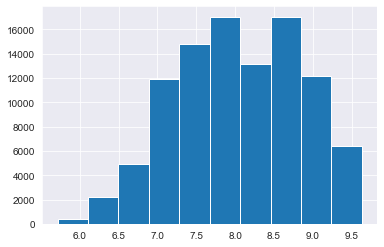

In [20]:
plt.hist(np.log(cleaned_df['Monthly_Inhand_Salary']))

(array([33024., 21832., 11080., 11680.,  7672.,  5208.,  3976.,  3088.,
         1192.,  1248.]),
 array([  7005.93 ,  24304.065,  41602.2  ,  58900.335,  76198.47 ,
         93496.605, 110794.74 , 128092.875, 145391.01 , 162689.145,
        179987.28 ]),
 <BarContainer object of 10 artists>)

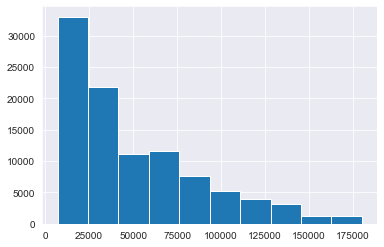

In [21]:
plt.hist(cleaned_df['Annual_Income'])

# Exploring Time Series Features of Data

In [22]:
cleaned_df.groupby('Customer_ID', group_keys=True)['Credit_Score'].apply(lambda x : x[:10])

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_91823/2544113446.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cleaned_df.groupby('Customer_ID', group_keys=True)['Credit_Score'].apply(lambda x : x[:10])


Customer_ID       
1006         14744    Poor
             14745    Poor
             14746    Poor
             14747    Poor
             14748    Poor
                      ... 
50999        54219    Good
             54220    Good
             54221    Good
             54222    Good
             54223    Good
Name: Credit_Score, Length: 100000, dtype: object

In [23]:
cleaned_df['Customer_ID'].nunique()

12500

In [24]:
np.unique(cleaned_df['Credit_Score'])

array(['Good', 'Poor', 'Standard'], dtype=object)

In [25]:
label2idx = {'Poor': 0, 'Standard': 1, 'Good': 2}

# cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score'] = cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score']

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [26]:
idx2label = {}
for idx, value in label2idx.items():
    idx2label[value] = idx

idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

In [103]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.utils import column_or_1d

In [104]:
# class CreditScoreEncoder(LabelEncoder):
#
#     def fit(self, y):
#         y = column_or_1d(y, warn=True)
#         self.classes_ = np.array(['Poor', 'Standard', 'Good'])
#         return self

In [105]:
# le = CreditScoreEncoder()
#
# cleaned_df['Credit_Score'] = le.fit_transform(cleaned_df['Credit_Score'])

In [106]:
# idx2label = {}
# for idx, value in enumerate(le.classes_):
#     idx2label[idx] = value
#
# print(idx2label)

{0: 'Good', 1: 'Poor', 2: 'Standard'}


In [27]:
groupby_df = cleaned_df.groupby('Customer_ID', group_keys=True)['Credit_Score'].apply(lambda x : x[:])
groupby_df.index

MultiIndex([( 1006, 14744),
            ( 1006, 14745),
            ( 1006, 14746),
            ( 1006, 14747),
            ( 1006, 14748),
            ( 1006, 14749),
            ( 1006, 14750),
            ( 1006, 14751),
            ( 1007, 31744),
            ( 1007, 31745),
            ...
            (50996, 50022),
            (50996, 50023),
            (50999, 54216),
            (50999, 54217),
            (50999, 54218),
            (50999, 54219),
            (50999, 54220),
            (50999, 54221),
            (50999, 54222),
            (50999, 54223)],
           names=['Customer_ID', None], length=100000)

In [28]:
pivot = pd.pivot(data=cleaned_df, index='Customer_ID', columns='Month', values='Credit_Score')
pivot

Month,1,2,3,4,5,6,7,8
Customer_ID,,,,,,,,
1006,0,0,0,0,0,0,0,0
1007,1,1,1,1,1,1,1,0
1008,1,1,1,1,1,1,1,1
1009,1,1,1,1,1,1,1,1
1011,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
50984,0,0,0,0,1,0,0,0
50990,0,0,1,0,0,0,0,0
50992,1,1,1,1,1,1,1,1


In [29]:
pivot

Month,1,2,3,4,5,6,7,8
Customer_ID,,,,,,,,
1006,0,0,0,0,0,0,0,0
1007,1,1,1,1,1,1,1,0
1008,1,1,1,1,1,1,1,1
1009,1,1,1,1,1,1,1,1
1011,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
50984,0,0,0,0,1,0,0,0
50990,0,0,1,0,0,0,0,0
50992,1,1,1,1,1,1,1,1


In [83]:
customer_id = pivot.index

In [30]:
factor = 10
for i in pivot.values[:10]:
    print((i + 1) * factor)
    factor += 1
# plt.show()

[10 10 10 10 10 10 10 10]
[22 22 22 22 22 22 22 11]
[24 24 24 24 24 24 24 24]
[26 26 26 26 26 26 26 26]
[28 28 28 28 28 28 28 28]
[30 30 30 30 30 30 15 15]
[48 48 48 48 48 32 32 32]
[34 34 34 34 34 34 34 34]
[18 36 36 18 18 18 18 18]
[38 57 57 38 57 57 57 57]


In [31]:
def plot_8month_credit_score(pivot_tbl):
    plt.figure(figsize=(15, 5))
    plt.title('Credit Score Timeline of Each Customer', fontsize=15, y=1.05)
    # factor = 100
    for i in pivot_tbl.values:
        plt.plot(i)
        # factor += 0.01

    plt.xlabel('Month')
    # plt.ylabel('0: Poor, 1: Standard, 2: Good')
    # plt.ylim(0, 3)

    plt.show()

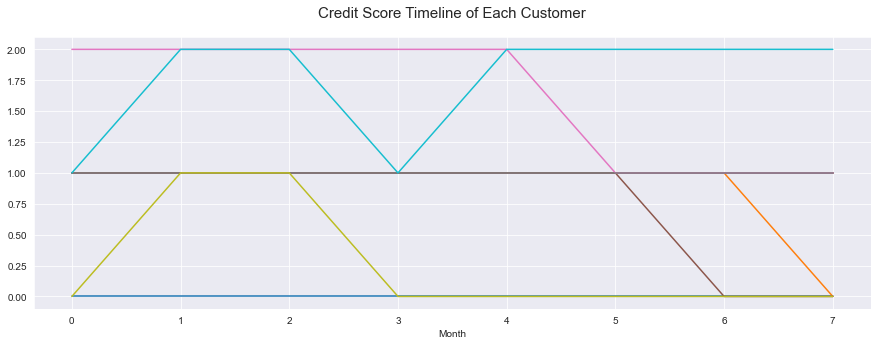

In [32]:
plot_8month_credit_score(pivot[:10])

In [76]:
credit_changes = np.diff(pivot, axis=1)
credit_changes

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [86]:
credit_changed_customer_list = np.abs(credit_changes).mean(axis=1) > 0
changed_customer_series = pd.Series(credit_changed_customer_list, index=customer_id)
changed_customer_series

Customer_ID
1006     False
1007      True
1008     False
1009     False
1011     False
         ...  
50984     True
50990     True
50992    False
50996    False
50999    False
Length: 12500, dtype: bool

In [88]:
changed_customer_id = changed_customer_series.loc[ changed_customer_series == 1 ].index
changed_customer_id

Int64Index([ 1007,  1013,  1014,  1017,  1019,  1029,  1039,  1041,  1043,
             1045,
            ...
            50946, 50957, 50958, 50962, 50965, 50966, 50975, 50983, 50984,
            50990],
           dtype='int64', name='Customer_ID', length=7292)

In [90]:
cleaned_df['credit_ever_changes'] = 0
cleaned_df.loc[ cleaned_df['Customer_ID'].isin(changed_customer_id), 'credit_ever_changes'] = 1
cleaned_df[['Customer_ID', 'credit_ever_changes']]

,Customer_ID,credit_ever_changes
0,3392,1
1,3392,1
2,3392,1
3,3392,1
4,3392,1
...,...,...
99995,37932,1
99996,37932,1
99997,37932,1
99998,37932,1


In [92]:
print(13749 in changed_customer_id)
print(49150 in changed_customer_id)

True
False


값이 제대로 할당된 것 확인 완료

In [94]:
cleaned_df.groupby('credit_ever_changes')['Credit_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
credit_ever_changes,,,,,,,,
0,41664.0,0.921275,0.512470,0.0,1.0,1.0,1.0,2.0
1,58336.0,0.864749,0.769689,0.0,0.0,1.0,1.0,2.0


In [95]:
idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

기본적으로 credit score가 변경되었던 고객보다 변경되지 않은 고객들의 credit score가 더 건강했음 (평균이 살짝 더 높음)
하지만 연봉 등과 같은 지표에서는 변동이 있던 고객이 더 높게 잡힘

In [96]:
cleaned_df.groupby('credit_ever_changes')[total_cols].mean()

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_91823/2591850281.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cleaned_df.groupby('credit_ever_changes')[total_cols].mean()


,Annual_Income,Monthly_Inhand_Salary,Monthly_Balance,Amount_invested_monthly,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month,Num_Bank_Accounts,Num_Credit_Card,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Num_of_Loan
credit_ever_changes,,,,,,,,,,,,,,
0,47876.009929,3984.374448,388.300949,53.101689,20.437476,13.628432,1331.018694,96.503998,5.470646,5.435844,11.281379,5.500552,32.205258,3.422619
1,52382.855650,4349.322999,395.837697,56.529463,21.541312,13.087922,1494.214117,115.694909,5.296095,5.603367,9.891061,6.010868,32.342248,3.611629


이런 시계열적 특성은 크게 의미가 없을 수 있음. 그리고 미래 데이터에 대해서 credit_ever_changes를 사용할 수가 없음.. 뭉터기로 데이터가 들어올텐데, 타겟값에 대해서 알 수가 없으니.. 이건 feature로 활용은 불가능하고, 시각화나 EDA목적에서만 사용 가능

In [36]:
pivot.values

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2]])

## Age 구간화

In [37]:
cleaned_df['Age'].describe()

count    100000.000000
mean         33.316340
std          10.764812
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

In [38]:
age_range = [10, 20, 30, 40, 50, 60]
age_labels = [10, 20, 30, 40, 50]
age_bins = pd.cut(cleaned_df['Age'], bins=age_range, labels=age_labels)
age_bins.describe()

count     100000
unique         5
top           30
freq       28968
Name: Age, dtype: int64

In [39]:
age_bins

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

(array([14003.,     0., 28793.,     0.,     0., 28968.,     0., 21006.,
            0.,  7230.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <BarContainer object of 10 artists>)

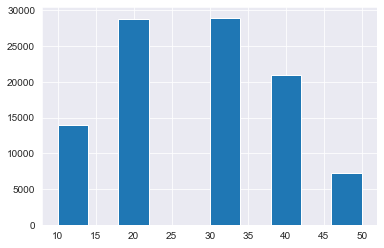

In [40]:
plt.hist(age_bins)

In [41]:
cleaned_df['Age'] = age_bins
cleaned_df['Age']

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

In [42]:
age_df = pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts())
age_df

Credit_Score
Age Credit_Score              
10  1                     7331
    0                     5165
    2                     1507
20  1                    15216
    0                     8987
    2                     4590
30  1                    15295
    0                     8794
    2                     4879
40  1                    11355
    0                     5204
    2                     4447
50  1                     3977
    2                     2405
    0                      848

In [43]:
display(pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack()))
print(pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack()).columns)
print(pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack()).index)

Credit_Score,0,1,2
Age,,,
10,5165,7331,1507
20,8987,15216,4590
30,8794,15295,4879
40,5204,11355,4447
50,848,3977,2405


Int64Index([0, 1, 2], dtype='int64', name='Credit_Score')
CategoricalIndex([10, 20, 30, 40, 50], categories=[10, 20, 30, 40, 50], ordered=True, dtype='category', name='Age')


In [44]:
dfu = pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack())
dfu.columns = list(map(lambda x: idx2label[x], dfu.columns))
dfu

,Poor,Standard,Good
Age,,,
10,5165,7331,1507
20,8987,15216,4590
30,8794,15295,4879
40,5204,11355,4447
50,848,3977,2405


In [45]:
dfu_percentage = pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack())
dfu_percentage

Credit_Score,0,1,2
Age,,,
10,5165,7331,1507
20,8987,15216,4590
30,8794,15295,4879
40,5204,11355,4447
50,848,3977,2405


In [46]:
dfu.sum(axis=1)
dfu_percentage = dfu.T.apply(lambda x : np.round(x/x.sum(), 3))
dfu_percentage

Age,10,20,30,40,50
Poor,0.369,0.312,0.304,0.248,0.117
Standard,0.524,0.528,0.528,0.541,0.550
Good,0.108,0.159,0.168,0.212,0.333


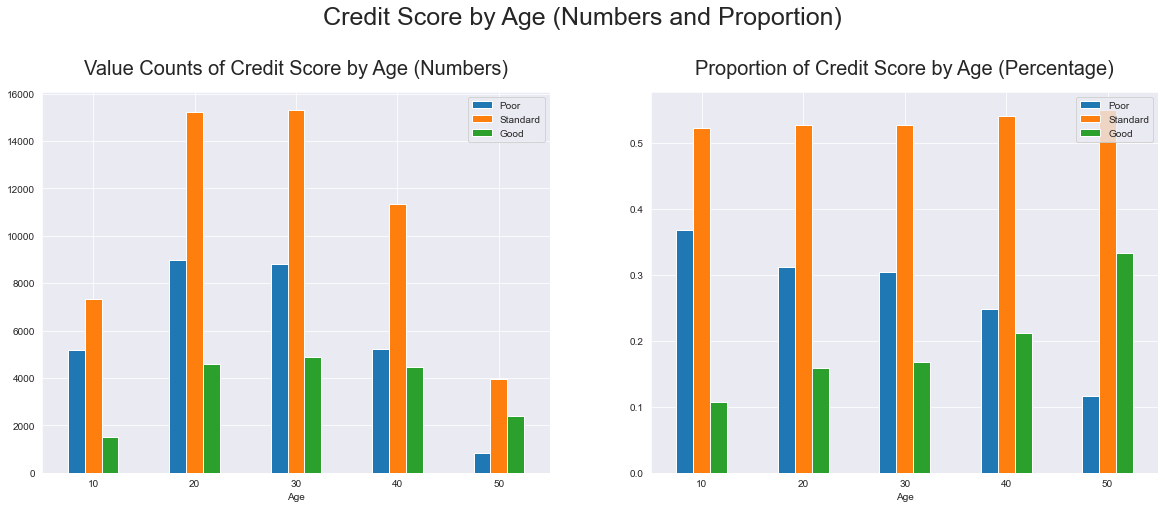

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
dfu.plot(kind='bar', ax=ax[0])
ax[0].tick_params(labelrotation=0)
ax[0].set_title('Value Counts of Credit Score by Age (Numbers)', fontsize=20, y=1.03)

dfu_percentage.T.plot(kind='bar', ax=ax[1])
ax[1].tick_params(labelrotation=0)
ax[1].set_title('Proportion of Credit Score by Age (Percentage)', fontsize=20, y=1.03)

fig.suptitle('Credit Score by Age (Numbers and Proportion)', fontsize=25, y=1.05)

plt.show()

In [48]:
cleaned_df.groupby('Customer_ID').describe()

KeyboardInterrupt: 

In [49]:
income_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance']
inv_cols = ['Amount_invested_monthly']
debt_cols = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt',
             'Total_EMI_per_month']
credit_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
               'Credit_Mix', 'Credit_Utilization_Ratio']
loan_cols = ['Num_of_Loan']

In [50]:
total_cols = income_cols + inv_cols + debt_cols + credit_cols + loan_cols
print(total_cols)
total_len = len(income_cols + inv_cols + debt_cols + credit_cols + loan_cols)
total_len

['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance', 'Amount_invested_monthly', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Total_EMI_per_month', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Num_of_Loan']


15

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_91823/1902789764.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cleaned_df[total_cols].hist(ax=ax)


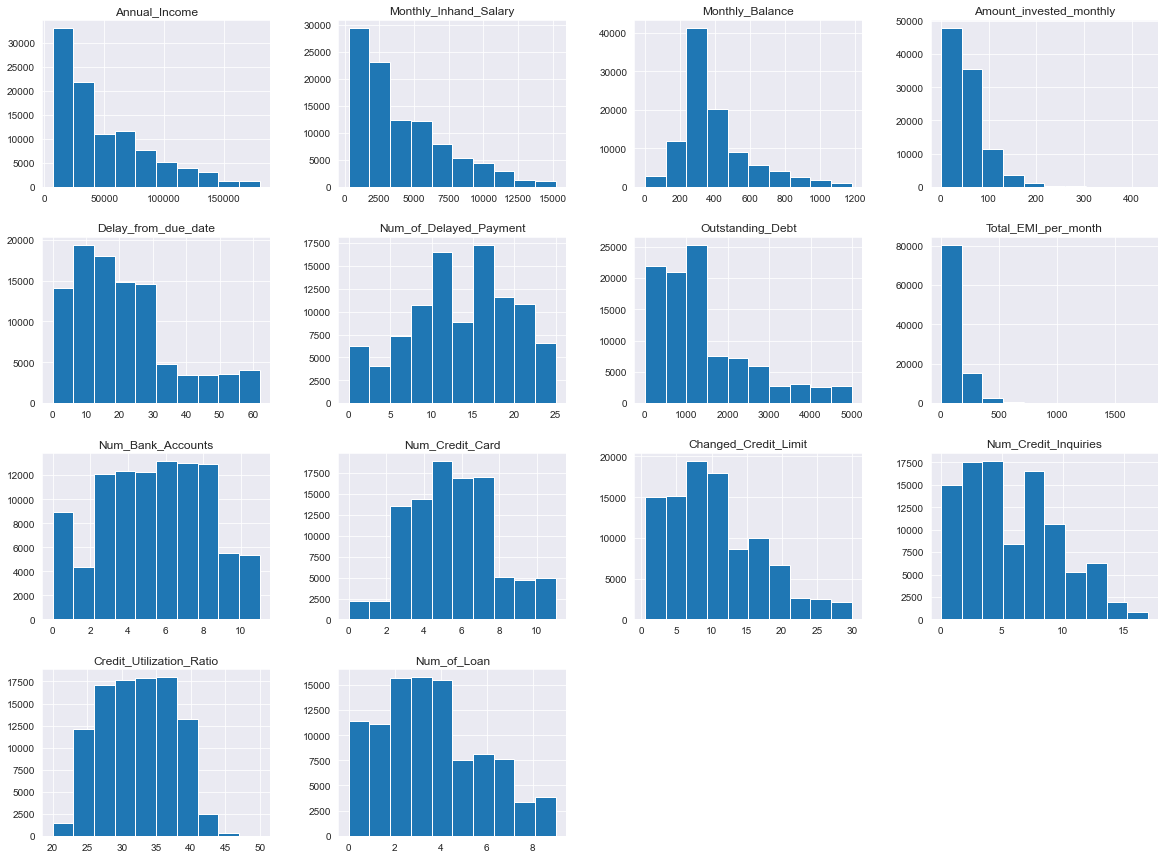

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
cleaned_df[total_cols].hist(ax=ax)
plt.show()

In [52]:
print((cleaned_df['Monthly_Inhand_Salary'] == 0).sum())
print((cleaned_df['Annual_Income'] == 0).sum())
print((cleaned_df['Amount_invested_monthly'] == 0).sum())
print((cleaned_df['Changed_Credit_Limit'] == 0).sum())

0
0
1920
0


다행히 월급이나 연봉이 0인 사람은 없다. -> 로그 변환 가능 right skewness완화 시킬 수 있음

In [53]:
np.sqrt(0)

0.0

<AxesSubplot:>

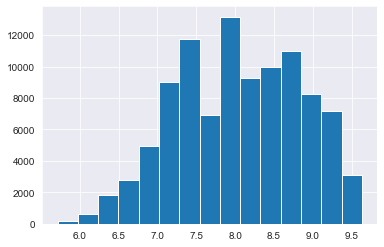

In [54]:
np.log(cleaned_df['Monthly_Inhand_Salary']).hist(bins=15)

<AxesSubplot:>

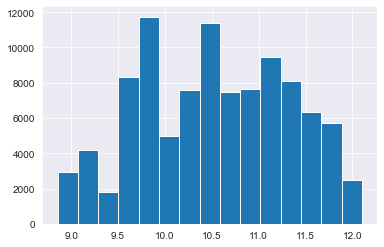

In [55]:
np.log(cleaned_df['Annual_Income']).hist(bins=15)

<AxesSubplot:>

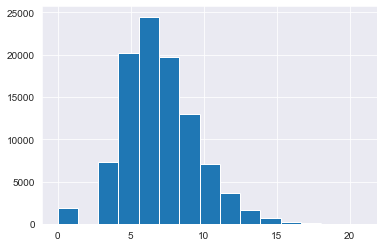

In [56]:
np.sqrt(cleaned_df['Amount_invested_monthly']).hist(bins=15)

In [57]:
cleaned_df['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.470323
std           6.609481
min           0.500000
25%           5.380000
50%           9.400000
75%          14.850000
max          29.980000
Name: Changed_Credit_Limit, dtype: float64

In [58]:
total_cols + ['Credit_Score']

['Annual_Income',
 'Monthly_Inhand_Salary',
 'Monthly_Balance',
 'Amount_invested_monthly',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Credit_Utilization_Ratio',
 'Num_of_Loan',
 'Credit_Score']

In [59]:
corr = cleaned_df[total_cols + ['Credit_Score']].corr()

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_91823/1878205077.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cleaned_df[total_cols + ['Credit_Score']].corr()


In [60]:
corr

,Annual_Income,Monthly_Inhand_Salary,Monthly_Balance,Amount_invested_monthly,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month,Num_Bank_Accounts,Num_Credit_Card,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Num_of_Loan,Credit_Score
Annual_Income,1.000000,0.998154,0.625640,0.806281,-0.250105,-0.286297,-0.269319,0.438106,-0.284060,-0.217852,-0.176353,-0.280242,0.175930,-0.255560,0.212606
Monthly_Inhand_Salary,0.998154,1.000000,0.626631,0.807326,-0.249438,-0.285360,-0.269044,0.421836,-0.283181,-0.216847,-0.176187,-0.279736,0.176092,-0.254298,0.209761
Monthly_Balance,0.625640,0.626631,1.000000,0.477342,-0.272273,-0.286045,-0.316440,0.071370,-0.286709,-0.231913,-0.198706,-0.314332,0.224729,-0.429416,0.197728
Amount_invested_monthly,0.806281,0.807326,0.477342,1.000000,-0.201737,-0.228459,-0.220777,0.349863,-0.227828,-0.174600,-0.146724,-0.222793,0.135089,-0.214254,0.172225
Delay_from_due_date,-0.250105,-0.249438,-0.272273,-0.201737,1.000000,0.541627,0.572206,0.078820,0.560193,0.479762,0.296571,0.539919,-0.063823,0.501599,-0.431446
Num_of_Delayed_Payment,-0.286297,-0.285360,-0.286045,-0.228459,0.541627,1.000000,0.504019,0.053653,0.601842,0.423300,0.329311,0.499689,-0.073774,0.473919,-0.372978
Outstanding_Debt,-0.269319,-0.269044,-0.316440,-0.220777,0.572206,0.504019,1.000000,0.110159,0.507063,0.490376,0.463684,0.597100,-0.071165,0.638713,-0.386525
Total_EMI_per_month,0.438106,0.421836,0.071370,0.349863,0.078820,0.053653,0.110159,1.000000,0.050035,0.058853,0.068333,0.100581,0.022365,0.328485,0.016572
Num_Bank_Accounts,-0.284060,-0.283181,-0.286709,-0.227828,0.560193,0.601842,0.507063,0.050035,1.000000,0.442694,0.333794,0.518323,-0.071783,0.472483,-0.388165
Num_Credit_Card,-0.217852,-0.216847,-0.231913,-0.174600,0.479762,0.423300,0.490376,0.058853,0.442694,1.000000,0.255495,0.459429,-0.055249,0.417960,-0.404435


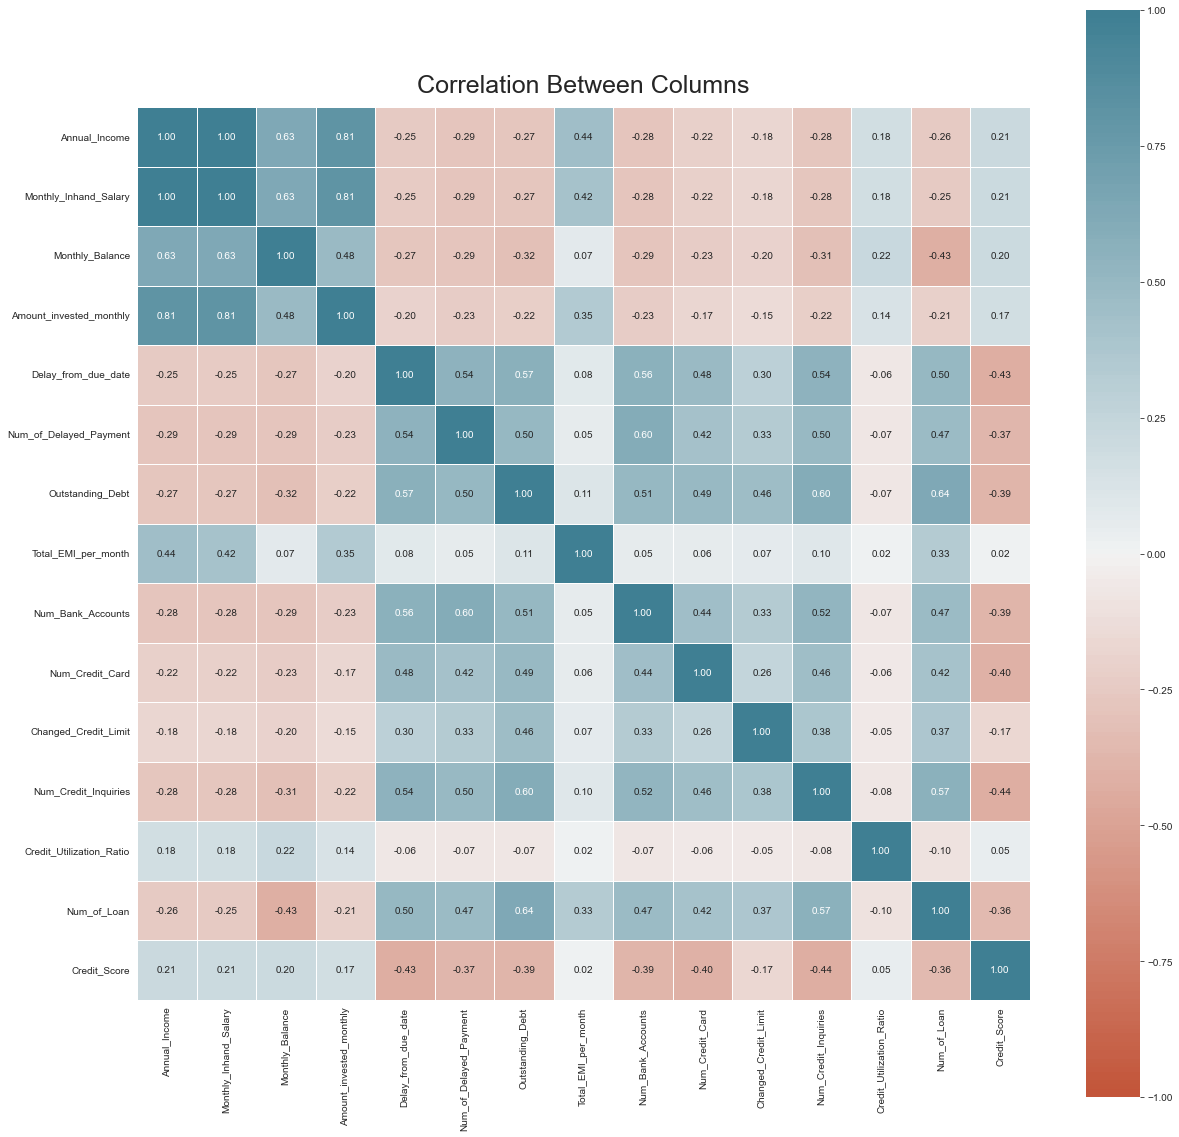

In [74]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True,
            fmt='.2f',
            linewidths=1,
            square=True,
            # annot_kws={"fontsize": 10},
            ax=ax)
# sns.set(font_scale=10)
ax.set_title('Correlation Between Columns', fontsize=25, y=1.01)
fig.savefig('./cols_corr.png')

In [75]:
loan_corr = cleaned_df.iloc[:, -11:].corr()
loan_corr

,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
AutoLoan,1.000000,0.089776,0.065968,0.059105,0.073313,-0.212962,0.059253,0.081161,0.074365,0.061411,-0.153573
Credit-BuilderLoan,0.089776,1.000000,0.059062,0.088251,0.074767,-0.217417,0.061945,0.072586,0.071882,0.065310,-0.146575
DebtConsolidationLoan,0.065968,0.059062,1.000000,0.076807,0.068672,-0.215705,0.065886,0.076109,0.072626,0.054802,-0.155630
HomeEquityLoan,0.059105,0.088251,0.076807,1.000000,0.075995,-0.216924,0.070406,0.085833,0.079139,0.064168,-0.147420
MortgageLoan,0.073313,0.074767,0.068672,0.075995,1.000000,-0.217465,0.098111,0.068334,0.078554,0.068855,-0.149826
NoData,-0.212962,-0.217417,-0.215705,-0.216924,-0.217465,1.000000,-0.218399,-0.219150,-0.216138,-0.215138,0.157590
NotSpecified,0.059253,0.061945,0.065886,0.070406,0.098111,-0.218399,1.000000,0.077166,0.065915,0.069831,-0.143519
PaydayLoan,0.081161,0.072586,0.076109,0.085833,0.068334,-0.219150,0.077166,1.000000,0.063978,0.067061,-0.154094
PersonalLoan,0.074365,0.071882,0.072626,0.079139,0.078554,-0.216138,0.065915,0.063978,1.000000,0.067630,-0.148990
StudentLoan,0.061411,0.065310,0.054802,0.064168,0.068855,-0.215138,0.069831,0.067061,0.067630,1.000000,-0.148499


In [ ]:
pd.crosstab()